# EDA on datasets - PART 2



In [43]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path_100="data/Sentences_AllAgree.txt.csv"
path_75="data/Sentences_75Agree.txt.csv"
path_66="data/Sentences_66Agree.txt.csv"
path_50="data/Sentences_50Agree.txt.csv"

In [3]:
# load dataframes
df_100=pd.read_csv(path_100)
df_75=pd.read_csv(path_75)
df_66=pd.read_csv(path_66)
df_50=pd.read_csv(path_50)

In [4]:
df_100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2259 entries, 0 to 2258
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence   2259 non-null   object
 1   sentiment  2259 non-null   object
 2   agreement  2259 non-null   object
dtypes: object(3)
memory usage: 53.1+ KB


In [5]:
df_100.head()

,sentence,sentiment,agreement
0,"According to Gran , the company has no plans t...",neutral,All
1,"For the last quarter of 2010 , Componenta 's n...",positive,All
2,"In the third quarter of 2010 , net sales incre...",positive,All
3,Operating profit rose to EUR 13.1 mn from EUR ...,positive,All
4,"Operating profit totalled EUR 21.1 mn , up fro...",positive,All


In [6]:
df_75.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3448 entries, 0 to 3447
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence   3448 non-null   object
 1   sentiment  3448 non-null   object
 2   agreement  3448 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 80.9+ KB


In [7]:
df_75.head()

,sentence,sentiment,agreement
0,"According to Gran , the company has no plans t...",neutral,75
1,With the new production plant the company woul...,positive,75
2,"For the last quarter of 2010 , Componenta 's n...",positive,75
3,"In the third quarter of 2010 , net sales incre...",positive,75
4,Operating profit rose to EUR 13.1 mn from EUR ...,positive,75


In [8]:
df_66.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4211 entries, 0 to 4210
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence   4211 non-null   object
 1   sentiment  4211 non-null   object
 2   agreement  4211 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 98.8+ KB


In [9]:
df_66.head()

,sentence,sentiment,agreement
0,"According to Gran , the company has no plans t...",neutral,66
1,Technopolis plans to develop in stages an area...,neutral,66
2,With the new production plant the company woul...,positive,66
3,According to the company 's updated strategy f...,positive,66
4,"For the last quarter of 2010 , Componenta 's n...",positive,66


In [10]:
df_50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4840 entries, 0 to 4839
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence   4840 non-null   object
 1   sentiment  4840 non-null   object
 2   agreement  4840 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 113.6+ KB


In [11]:
df_50.head()

,sentence,sentiment,agreement
0,"According to Gran , the company has no plans t...",neutral,50
1,Technopolis plans to develop in stages an area...,neutral,50
2,The international electronic industry company ...,negative,50
3,With the new production plant the company woul...,positive,50
4,According to the company 's updated strategy f...,positive,50


## important info
1. df_100 => all the sentiment predictions are agreed by all the annotation members

    ie, we dont need to change change anything . we can trust this data
    
    df_100 has,
    
    neutral : 1386
    
    positive: 570
    
    negative: 303
    

df_100 entries has 100% confidence for the sentiment

df_75 entries will have entries having 75% confidence and 100% confidence

So , to get entries only having 75% confidence => we need to remove entries having 100 % confidence from df_75

### filter 75 % only entries from df_75 and save as agree_75_only.csv

In [12]:
df_75_merged=df_75.merge(df_100, on=["sentence","sentiment"] ,how = "left" , indicator=True)
df_75_only=df_75_merged[df_75_merged['_merge'] == 'left_only'].drop(columns=['_merge' ,"agreement_y"])
df_75_only.rename(columns={'agreement_x': 'agreement'},inplace=True)
df_75_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1189 entries, 1 to 3442
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence   1189 non-null   object
 1   sentiment  1189 non-null   object
 2   agreement  1189 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 37.2+ KB


In [13]:
df_75_only.head()

,sentence,sentiment,agreement
1,With the new production plant the company woul...,positive,75
6,TeliaSonera TLSN said the offer is in line wit...,positive,75
7,"STORA ENSO , NORSKE SKOG , M-REAL , UPM-KYMMEN...",positive,75
8,"A purchase agreement for 7,200 tons of gasolin...",positive,75
14,Incap Contract Manufacturing Services Pvt Ltd ...,positive,75


In [14]:
df_75_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1189 entries, 1 to 3442
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence   1189 non-null   object
 1   sentiment  1189 non-null   object
 2   agreement  1189 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 37.2+ KB


In [15]:
df_75_only[["sentence" ,"sentiment"]].duplicated().sum()

np.int64(0)

In [16]:
df_75_only.head()

,sentence,sentiment,agreement
1,With the new production plant the company woul...,positive,75
6,TeliaSonera TLSN said the offer is in line wit...,positive,75
7,"STORA ENSO , NORSKE SKOG , M-REAL , UPM-KYMMEN...",positive,75
8,"A purchase agreement for 7,200 tons of gasolin...",positive,75
14,Incap Contract Manufacturing Services Pvt Ltd ...,positive,75


In [17]:
Counter(df_75_only["sentiment"])

Counter({'neutral': 755, 'positive': 317, 'negative': 117})

In [18]:
df_75_only.to_csv("data/agree_75_only.csv",index=False)

### filter 66 % only entries from df_66 and save as agree_66_only.csv

In [19]:
df_66_merged=df_66.merge(df_75, on=["sentence","sentiment"] ,how = "left" , indicator=True)
df_66_only=df_66_merged[df_66_merged['_merge'] == 'left_only'].drop(columns=['_merge' ,"agreement_y"])
df_66_only.rename(columns={'agreement_x': 'agreement'},inplace=True)
df_66_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 763 entries, 1 to 4208
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence   763 non-null    object
 1   sentiment  763 non-null    object
 2   agreement  763 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 23.8+ KB


In [20]:
df_66_only.head()

,sentence,sentiment,agreement
1,Technopolis plans to develop in stages an area...,neutral,66
3,According to the company 's updated strategy f...,positive,66
27,The Brazilian unit of Finnish security solutio...,positive,66
43,The agreement was signed with Biohit Healthcar...,positive,66
48,"Within the framework of the partnership , Noki...",positive,66


In [21]:
df_66_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 763 entries, 1 to 4208
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence   763 non-null    object
 1   sentiment  763 non-null    object
 2   agreement  763 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 23.8+ KB


In [22]:
df_66_only[["sentence" ,"sentiment"]].duplicated().sum()

np.int64(0)

In [23]:
Counter(df_66_only["sentiment"])

Counter({'neutral': 388, 'positive': 281, 'negative': 94})

In [24]:
df_66_only.to_csv("data/agree_66_only.csv",index=False)

### filter 50 % only entries from df_50 and save as agree_50_only.csv

In [25]:
df_50_merged=df_50.merge(df_66, on=["sentence","sentiment"] ,how = "left" , indicator=True)
df_50_only=df_50_merged[df_50_merged['_merge'] == 'left_only'].drop(columns=['_merge' ,"agreement_y"])
df_50_only.rename(columns={'agreement_x': 'agreement'},inplace=True)
df_50_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 629 entries, 2 to 4838
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence   629 non-null    object
 1   sentiment  629 non-null    object
 2   agreement  629 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 19.7+ KB


In [26]:
df_50_only.head()

,sentence,sentiment,agreement
2,The international electronic industry company ...,negative,50
5,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,positive,50
21,( Filippova ) A trilateral agreement on invest...,positive,50
43,Sales for both the Department Store Division a...,positive,50
62,`` The new agreement is a continuation to thea...,neutral,50


In [27]:
df_50_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 629 entries, 2 to 4838
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence   629 non-null    object
 1   sentiment  629 non-null    object
 2   agreement  629 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 19.7+ KB


In [28]:
df_50_only[["sentence" ,"sentiment"]].duplicated().sum()

np.int64(0)

In [29]:
Counter(df_50_only["sentiment"])

Counter({'neutral': 344, 'positive': 195, 'negative': 90})

In [30]:
df_50_only.to_csv("data/agree_50_only.csv",index=False)

### Merge df_100 ,df_75_only,df_66_only and df_50 only to get correct dataset

In [31]:
df1=pd.read_csv("data/Sentences_AllAgree.txt.csv")
df2=pd.read_csv("data/agree_75_only.csv")
df3=pd.read_csv("data/agree_66_only.csv")
df4=pd.read_csv("data/agree_50_only.csv")

In [32]:
correct_df=pd.concat([df1,df2,df3,df4],ignore_index=True,axis=0)

In [33]:
correct_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4840 entries, 0 to 4839
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence   4840 non-null   object
 1   sentiment  4840 non-null   object
 2   agreement  4840 non-null   object
dtypes: object(3)
memory usage: 113.6+ KB


In [34]:
correct_df.describe()

,sentence,sentiment,agreement
count,4840,4840,4840
unique,4838,3,4
top,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...,neutral,All
freq,2,2873,2259


In [35]:
duplicated_ids = correct_df[correct_df['sentence'].duplicated(keep=False)]

print(duplicated_ids)

                                               sentence sentiment agreement
3458  TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...  positive        66
3574  The Group 's business is balanced by its broad...  positive        66
4221  TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...   neutral        50
4305  The Group 's business is balanced by its broad...   neutral        50


### NOTE: TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel => 50% agreement with neutral and  66% with positive similarly The Group 's business is balanced by its broad . so removed 4 entries related to that

In [41]:
correct_df.drop_duplicates(subset="sentence",inplace=True,keep=False)
                                      

In [42]:
correct_df.describe()

,sentence,sentiment,agreement
count,4836,4836,4836
unique,4836,3,4
top,Net sales of the Paper segment decreased to EU...,neutral,All
freq,1,2871,2259


In [71]:
correct_df.head()

,sentence,sentiment,agreement
0,"According to Gran , the company has no plans t...",neutral,All
1,"For the last quarter of 2010 , Componenta 's n...",positive,All
2,"In the third quarter of 2010 , net sales incre...",positive,All
3,Operating profit rose to EUR 13.1 mn from EUR ...,positive,All
4,"Operating profit totalled EUR 21.1 mn , up fro...",positive,All


In [95]:
correct_df['agreement'] = correct_df['agreement'].replace({'All':100 ,'75':75,'66':66,'50':50})

C:\Users\swath\AppData\Local\Temp\ipykernel_20924\1279265828.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  correct_df['agreement'] = correct_df['agreement'].replace({'All':100 ,'75':75,'66':66,'50':50})


In [96]:
correct_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4836 entries, 0 to 4839
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence   4836 non-null   object
 1   sentiment  4836 non-null   object
 2   agreement  4836 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 151.1+ KB


In [98]:
Counter(correct_df["agreement"])

Counter({100: 2259, 75: 1189, 66: 761, 50: 627})

In [101]:
correct_df.rename(columns={"agreement" : "confidence"} ,inplace=True)

In [102]:
correct_df.head()

,sentence,sentiment,confidence
0,"According to Gran , the company has no plans t...",neutral,100
1,"For the last quarter of 2010 , Componenta 's n...",positive,100
2,"In the third quarter of 2010 , net sales incre...",positive,100
3,Operating profit rose to EUR 13.1 mn from EUR ...,positive,100
4,"Operating profit totalled EUR 21.1 mn , up fro...",positive,100


In [103]:
correct_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4836 entries, 0 to 4839
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sentence    4836 non-null   object
 1   sentiment   4836 non-null   object
 2   confidence  4836 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 151.1+ KB


### Visualization

In [104]:
ploting_data=correct_df.groupby('confidence')['sentiment'].value_counts().unstack(fill_value=0)
type(ploting_data)

pandas.core.frame.DataFrame

In [105]:
ploting_data

sentiment,negative,neutral,positive
confidence,,,
50,90,342,195
66,94,388,279
75,117,755,317
100,303,1386,570


In [109]:
ploting_data.loc[50]["positive"]

np.int64(195)

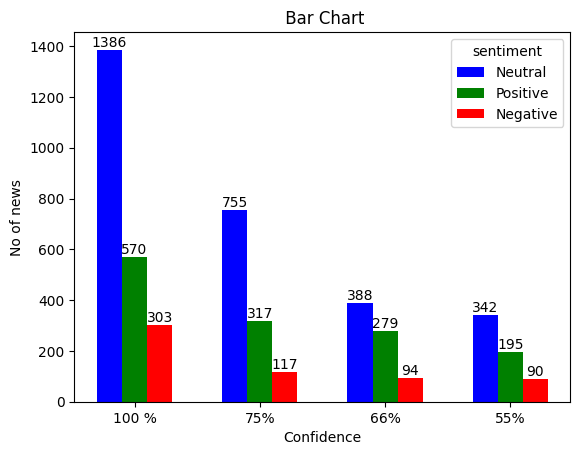

In [112]:
categories = ['Neutral', 'Positive', 'Negative']
groups = ['100 %', '75%', '66%',"55%"]
confidence_100=[ploting_data.loc[100]["neutral"] ,ploting_data.loc[100]["positive"] ,ploting_data.loc[100]["negative"]]
confidence_75=[ploting_data.loc[75]["neutral"] ,ploting_data.loc[75]["positive"] ,ploting_data.loc[75]["negative"]]
confidence_66=[ploting_data.loc[66]["neutral"] ,ploting_data.loc[66]["positive"] ,ploting_data.loc[66]["negative"]]
confidence_50=[ploting_data.loc[50]["neutral"] ,ploting_data.loc[50]["positive"] ,ploting_data.loc[50]["negative"]]


                
                
values = np.array([confidence_100, confidence_75, confidence_66,confidence_50])
n_groups = len(groups)
n_categories = len(categories)
bar_width = 0.2

fig, ax = plt.subplots()
colors=["blue","green","red"]
# bars for each category
for i in range(n_categories):
    
    bars = ax.bar(index + i * bar_width, values[:, i], bar_width, label=categories[i], color=colors[i])
    
        # Add count above each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, height, '%d' % int(height), 
                ha='center', va='bottom')


ax.set_xlabel('Confidence')
ax.set_ylabel('No of news')
ax.set_title(' Bar Chart')
ax.set_xticks(index + bar_width * (n_categories - 1) / 2)
ax.set_xticklabels(groups)
ax.legend(title='sentiment')


plt.show()

In [113]:
# save data

correct_df.to_csv("data/correct_dataset.csv",index=False)